# import Library

In [1]:
import pandas as pd
import matplotlib as plt
import math
import numpy as np

In [2]:
train=pd.read_csv("train_indessa.csv")
test=pd.read_csv("test_indessa.csv")

In [3]:
train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [4]:
target = train.loan_status.values
train.drop('loan_status', axis = 1, inplace = True)

In [5]:
df = train
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0


In [6]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06


In [7]:
member_no=df['member_id']

In [8]:
df.shape

(532428, 44)

In [9]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [10]:
#dropping data null data
missing=df.isnull().mean(axis=0)
thre=missing[missing>=0.5]
print(thre)#since the data which is above 0.5 are more missing value we need to drop 

desc                           0.858011
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758
mths_since_last_major_derog    0.750239
verification_status_joint      0.999427
dtype: float64


In [11]:
df.drop(thre.index,axis=1,inplace=True)
#desc, mths_since_last_delinq ,mths_since_last_record, mths_since_last_major_derog, verification_status_joint 

In [12]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [13]:
unique_col=['member_id','emp_title','batch_enrolled','home_ownership','purpose','zip_code', 'addr_state','title']
df.drop(unique_col,axis=1,inplace=True)

In [14]:
df.drop('grade',axis=1,inplace=True)

In [15]:
df.shape

(532428, 30)

In [16]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,verification_status,pymnt_plan,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,36 months,19.19,E3,9 years,28700.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,36 months,10.99,B4,< 1 year,65000.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,36 months,7.26,A4,2 years,45000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,36 months,19.72,D5,10+ years,105000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,36 months,10.64,B2,10+ years,52000.0,Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0


In [17]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
sub_grade                         0
emp_length                    26891
annual_inc                        3
verification_status               0
pymnt_plan                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       95
application_type                  0
last_week_pay                     0
acc_now_delinq                   16
tot_coll_amt                

# missing_values =[emp_length,annual_inc ,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq ,tot_coll_amt, tot_cur_bal, total_rev_hi_lim]

# Data Pre Processing

# Term feature 
we'll do some pre processing 

In [18]:
#Replace months string into ""
df["term"].replace(to_replace=' months',value='',regex=True,inplace=True)
#convert term to interger 
df['term']=pd.to_numeric(df['term'],errors='coerce')
print(df['term'].value_counts())

36    372793
60    159635
Name: term, dtype: int64


# emp_length 

In [19]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')
print(df['emp_length'])
print(df['emp_length'].value_counts())

0          9.0
1          0.0
2          2.0
3         10.0
4         10.0
          ... 
532423    10.0
532424    10.0
532425     8.0
532426     1.0
532427     0.0
Name: emp_length, Length: 532428, dtype: float64
10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64


## Sub Grade Feature
We'll do some preprocessing for the sub_grade attribute. 

In [20]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce')

In [21]:
df['sub_grade'].value_counts()

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

# Last Week Pay Feature¶
We'll do some preprocessing for the last_week_pay attribute.

In [22]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

In [23]:
df['last_week_pay'].value_counts()

13.0     30333
9.0      28626
26.0     27475
22.0     26000
4.0      25704
         ...  
300.0        1
278.0        1
274.0        1
269.0        1
304.0        1
Name: last_week_pay, Length: 97, dtype: int64

#  Filling missing values

In [24]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
sub_grade                         0
emp_length                    26891
annual_inc                        3
verification_status               0
pymnt_plan                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       95
application_type                  0
last_week_pay                 10614
acc_now_delinq                   16
tot_coll_amt                

In [25]:
missing_values =['emp_length','last_week_pay','annual_inc','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
for i in missing_values:
    df[i].fillna(df[i].median(),inplace=True)

    num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    df[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.

In [26]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
sub_grade                     0
emp_length                    0
annual_inc                    0
verification_status           0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

In [27]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,verification_status,pymnt_plan,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,36,10.99,14,0.0,65000.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,36,19.72,35,10.0,105000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,36,10.64,12,10.0,52000.0,Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0,47033.0


In [29]:
df['application_type'].value_counts()

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64

# creating dummy variable 

# converting the string to value using pandas get dummy variables 
1) verification status 'pymnt_plan','initial_list_status','verification_status','application_type'

In [30]:
pymnt= pd.get_dummies(df[['pymnt_plan','initial_list_status','verification_status','application_type']],drop_first=True)
pymnt.head()

,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT
0,0,0,1,0,0
1,0,1,1,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,1,0


# join all the dummy variable in the dataframe

In [31]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,verification_status,pymnt_plan,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,26.0,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,36,10.99,14,0.0,65000.0,Source Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9.0,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,36,19.72,35,10.0,105000.0,Not Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,135.0,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,36,10.64,12,10.0,52000.0,Verified,n,...,0.0,0.0,0.0,0.0,INDIVIDUAL,96.0,0.0,0.0,47159.0,47033.0


In [32]:
data=df.join(pymnt)

In [33]:
data.head()
print(data.shape)

(532428, 35)


In [34]:
data.drop(['pymnt_plan','initial_list_status','verification_status','application_type'],axis=1,inplace=True)


In [35]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,...,26.0,0.0,0.0,28699.0,30800.0,0,0,1,0,0
1,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,0.0,...,9.0,0.0,0.0,9974.0,32900.0,0,1,1,0,0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,...,9.0,0.0,65.0,38295.0,34900.0,0,1,0,0,0
3,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,0.0,...,135.0,0.0,0.0,55564.0,24700.0,0,0,0,0,0
4,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,0.0,...,96.0,0.0,0.0,47159.0,47033.0,0,1,0,1,0


In [36]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,5.324280e+05,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,5.324280e+05,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000
mean,14757.595722,14744.271291,14704.926696,43.195790,13.242969,20.940448,6.010026,7.502979e+04,18.138767,0.314439,...,57.898217,0.005015,196.713995,1.349086e+05,3.141942e+04,0.000015,0.485343,0.371412,0.328123,0.000573
std,8434.420080,8429.139277,8441.290381,10.996354,4.379611,12.974251,3.571685,6.519967e+04,8.369074,0.860034,...,43.896169,0.079116,1880.608549,1.485693e+05,3.659098e+04,0.003876,0.499786,0.483183,0.469530,0.023927
min,500.000000,500.000000,0.000000,36.000000,5.320000,1.000000,0.000000,1.200000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,12.000000,3.000000,4.500000e+04,11.930000,0.000000,...,22.000000,0.000000,0.000000,3.221800e+04,1.470000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,21.000000,6.000000,6.500000e+04,17.650000,0.000000,...,48.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,31.000000,10.000000,9.000000e+04,23.950000,0.000000,...,83.000000,0.000000,0.000000,1.960432e+05,3.790000e+04,0.000000,1.000000,1.000000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,65.000000,10.000000,9.500000e+06,672.520000,30.000000,...,304.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering¶
For convenience, I'll copy the original Dataframe to another variable and drop the target feature.

In [37]:
final_df = data.copy()

In [38]:
# How big the loan a person has taken with respect to his earnings, annual income to fund by bank ratio
final_df['income_to_loan'] = np.round_(final_df['annual_inc']/final_df['funded_amnt'], decimals = 2)

# How big the loan a person has taken with respect to his earnings, annual income to fund by investors ratio
final_df['income_to_loan_inv'] = np.round_(final_df['annual_inc']/final_df['funded_amnt_inv'], decimals = 2)


# Interest paid so far = interest received till date + Late fee received till date
final_df['total_int_paid'] = final_df['total_rec_int'] + final_df['total_rec_late_fee']

# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N] / [(1+R)^N-1]
principal = final_df['loan_amnt']
rate = final_df['int_rate'] /(100*12)
time = final_df['term']

final_df['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) np.round_(in_array, decimals = 2)
final_df['emi_paid_perc'] = np.round_(((final_df['last_week_pay'])/(final_df['term']/12*52+1))*100, decimals = 2)

In [39]:
final_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,...,0,0,1,0,0,2.00,2.00,1173.84,527.39,16.56
1,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,0.0,...,0,1,1,0,0,13.54,13.54,83.95,157.12,5.73
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,...,0,1,0,0,0,4.50,4.50,56.47,309.96,5.73
3,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,0.0,...,0,0,0,0,0,7.00,7.00,4858.62,555.32,85.99
4,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,0.0,...,0,1,0,1,0,3.25,3.25,2296.41,521.10,61.15


In [40]:
final_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,5.324280e+05,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.00,532428.000000,532428.000000,532428.000000
mean,14757.595722,14744.271291,14704.926696,43.195790,13.242969,20.940448,6.010026,7.502979e+04,18.138767,0.314439,...,0.000015,0.485343,0.371412,0.328123,0.000573,6.741189,inf,1753.823741,437.144696,32.643267
std,8434.420080,8429.139277,8441.290381,10.996354,4.379611,12.974251,3.571685,6.519967e+04,8.369074,0.860034,...,0.003876,0.499786,0.483183,0.469530,0.023927,9.249935,NaN,2093.570564,244.229889,25.932368
min,500.000000,500.000000,0.000000,36.000000,5.320000,1.000000,0.000000,1.200000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.10,0.000000,15.670000,0.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,12.000000,3.000000,4.500000e+04,11.930000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.330000,3.33,441.840000,260.900000,11.880000
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,21.000000,6.000000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,4.80,1072.940000,382.550000,24.840000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,31.000000,10.000000,9.000000e+04,23.950000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,7.500000,7.50,2235.500000,573.060000,47.130000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,65.000000,10.000000,9.500000e+06,672.520000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3236.150000,inf,24205.620000,1445.460000,193.630000


In [41]:
final_df.shape

(532428, 36)

In [42]:
def scaler():
    result = final_df.copy()
    for feature_name in final_df.columns:
        max_value = final_df[feature_name].max()
        min_value = final_df[feature_name].min()
        result[feature_name] = (final_df[feature_name] - min_value) / (max_value - min_value)
    return result

In [43]:
final_df = scaler()

In [44]:
final_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,pymnt_plan_y,initial_list_status_w,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532289.0,532428.000000,532428.000000,532428.000000
mean,0.413264,0.412877,0.420141,0.299825,0.334726,0.311570,0.601003,0.007773,0.026971,0.010481,...,0.000015,0.485343,0.371412,0.328123,0.000573,0.002052,0.0,0.072455,0.294781,0.168586
std,0.244476,0.244323,0.241180,0.458181,0.185028,0.202723,0.357169,0.006864,0.012444,0.028668,...,0.003876,0.499786,0.483183,0.469530,0.023927,0.002858,0.0,0.086491,0.170815,0.133927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.217391,0.217391,0.228571,0.000000,0.197296,0.171875,0.300000,0.004611,0.017739,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000998,0.0,0.018254,0.171515,0.061354
50%,0.362319,0.362319,0.371429,0.000000,0.324039,0.312500,0.600000,0.006717,0.026245,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001452,0.0,0.044326,0.256597,0.128286
75%,0.565217,0.565217,0.571429,1.000000,0.459654,0.468750,1.000000,0.009349,0.035612,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.002287,0.0,0.092355,0.389840,0.243402
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


## Train-Test split 
we split out data in training and testing 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(final_df), np.array(target), test_size=0.35)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((346078, 36), (346078,), (186350, 36), (186350,))

In [47]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

In [48]:
#CATBoost
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True)
cat_clf.fit(X_train, y_train)

# evaluate predictions
y_train_predict_cat = cat_clf.predict(X_train)
print("==========================")
print('Train Accuracy: %.3f' % metrics.accuracy_score(y_train, y_train_predict_cat))

# make predictions for test data
y_pred_cat = cat_clf.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score: %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions))

Train Accuracy: 0.929
ROC-AUC: 88.3270127143%
Test Accuracy: 0.921
[[135758   6399]
 [  8328  35865]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95    142157
           1       0.85      0.81      0.83     44193

    accuracy                           0.92    186350
   macro avg       0.90      0.88      0.89    186350
weighted avg       0.92      0.92      0.92    186350

Precision Score: 0.849
Recall Score: 0.812
F1 Score: 0.830


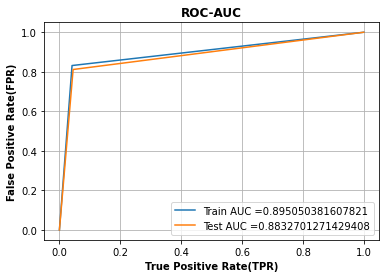

In [49]:

y_train_pred = cat_clf.predict(X_train)    
y_test_pred = cat_clf.predict(X_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show()